In [1]:
import json
import geopandas as gpd
import numpy as np

In [2]:
df=gpd.read_file("comuniCovidStat.json")

In [3]:
df.head()

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,covid,name_it,name_de,name_sl,geometry
0,Agliè,130,1010810010,Torino,001,1,TO,Piemonte,01,1,1,A074,001001,1001,63.960969,None,None,None,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,131,1010810020,Torino,001,1,TO,Piemonte,01,1,2,A109,001002,1002,92.071204,None,None,None,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,132,1010810030,Torino,001,1,TO,Piemonte,01,1,3,A117,001003,1003,11.239301,None,None,None,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,133,1010810040,Torino,001,1,TO,Piemonte,01,1,4,A157,001004,1004,43.135910,None,None,None,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,135,1010810060,Torino,001,1,TO,Piemonte,01,1,6,A218,001006,1006,152.820945,None,None,None,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."


In [23]:
from shapely.geometry import MultiPolygon

In [37]:
points=df.copy()

In [19]:
points.loc[0]

name                                                               Agliè
op_id                                                                130
minint_elettorale                                             1010810010
prov_name                                                         Torino
prov_istat_code                                                      001
prov_istat_code_num                                                    1
prov_acr                                                              TO
reg_name                                                        Piemonte
reg_istat_code                                                        01
reg_istat_code_num                                                     1
opdm_id                                                                1
com_catasto_code                                                    A074
com_istat_code                                                    001001
com_istat_code_num                                 

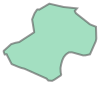

In [25]:
p=MultiPolygon(points.loc[0]["geometry"])
p

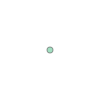

In [26]:
p.centroid

In [38]:
for i in range(len(points)):
    centroid=MultiPolygon(points.loc[i]["geometry"]).centroid
    points.at[i,"geometry"]=centroid

In [39]:
points.head()https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,covid,name_it,name_de,name_sl,geometry
0,Agliè,130,1010810010,Torino,001,1,TO,Piemonte,01,1,1,A074,001001,1001,63.960969,None,None,None,POINT (7.77599 45.36591)
1,Airasca,131,1010810020,Torino,001,1,TO,Piemonte,01,1,2,A109,001002,1002,92.071204,None,None,None,POINT (7.48351 44.92176)
2,Ala di Stura,132,1010810030,Torino,001,1,TO,Piemonte,01,1,3,A117,001003,1003,11.239301,None,None,None,POINT (7.28204 45.30681)
3,Albiano d'Ivrea,133,1010810040,Torino,001,1,TO,Piemonte,01,1,4,A157,001004,1004,43.135910,None,None,None,POINT (7.94366 45.43159)
4,Almese,135,1010810060,Torino,001,1,TO,Piemonte,01,1,6,A218,001006,1006,152.820945,None,None,None,POINT (7.42016 45.11801)


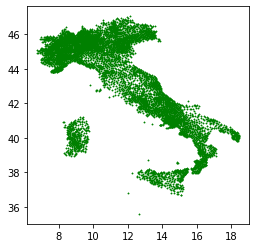

In [42]:
points.plot(marker='*', color='green', markersize=1)

In [48]:
points.iloc[0]["geometry"].x

7.775987256222128

In [54]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


X = [p.x for p in points.iloc[:]["geometry"]]
Y = [p.y for p in points.iloc[:]["geometry"]]
X, Y = np.meshgrid(X, Y)

Z = points.iloc[:]["covid"]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

ValueError: Argument Z must be 2-dimensional.

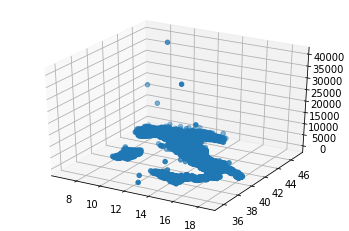

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = [p.x for p in points.iloc[:]["geometry"]]
Y = [p.y for p in points.iloc[:]["geometry"]]
Z = points.iloc[:]["covid"]

ax.scatter3D(X, Y, Z, 'gray')
plt.show()

In [62]:
points.to_file("pointsCovid.geojson",driver="GeoJSON")